# Import statements

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 62.5 MB/s eta 0:00:00


# Retrieve data from csv

In [3]:
# For colab
# from google.colab import drive
# drive.mount('/content/drive')

# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_30_mfcc.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_40_mfcc.csv')

# For local machine or virtual environment
audio_df = pd.read_csv('merged_df.csv')

# drop first column
audio_df.drop('Unnamed: 0', axis='columns', inplace=True)

from sklearn.utils import shuffle
audio_df = shuffle(audio_df)

audio_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
707,0,Crema\1003_MTI_ANG_XX.wav,-191.368594,35.956851,-8.901985,9.564676,-11.679267,-8.556141,-0.881728,-4.759869,...,4.015050e-03,4.048867e-03,3.735527e-03,4.119223e-03,-0.012976,0.010525,-0.014740,0.022282,-0.000445,-0.007087
3950,3,Crema\1055_IEO_FEA_LO.wav,-390.936956,97.276922,41.677945,24.680146,6.235366,10.506921,0.420645,-0.512374,...,3.431063e-05,3.505056e-05,3.487584e-05,3.496293e-05,-0.009597,-0.005020,-0.005609,-0.040591,0.022205,-0.015324
4944,12,Crema\1044_IEO_HAP_HI.wav,-310.441581,56.437147,21.032841,19.615016,8.847651,6.048719,5.049558,0.222736,...,4.744007e-04,4.908923e-04,4.874776e-04,4.157651e-04,0.000482,0.006807,-0.072675,-0.034322,0.017273,-0.000099
11160,4,Tess\YAF_happy\YAF_soap_happy.wav,-332.262270,31.191463,-6.530378,14.046421,-6.798549,-5.925126,-4.723826,-16.325169,...,1.184424e-02,2.179909e-02,2.489493e-02,2.748793e-03,0.016445,-0.060090,0.011340,-0.123915,-0.002997,-0.028395
10470,3,Crema\1012_IWL_FEA_XX.wav,-348.987240,125.132490,-0.406670,39.733868,-5.950247,15.410043,-1.365651,-0.557811,...,2.199637e-09,2.165466e-09,2.143573e-09,2.129774e-09,-0.031890,-0.014774,-0.051790,0.000606,0.029635,-0.007178


# Define Class Labels Dictionary


In [4]:
# Define class labels dictionary for with gender
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

# Define class labels dictionary for without gender
label_map_without_gender = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'neutral',
    6: 'sad',
    7: 'surprise'
}


# Train Test Split

In [5]:
# train-test split dataset
from sklearn.model_selection import train_test_split

final_df_testing = audio_df.copy()

# For non-augmented data
# X = final_df_testing.drop(columns=['Path', 'Emotions_without_gender', 'Emotions_with_gender'], axis=1)
# y = final_df_testing['Emotions_with_gender']

# For merged data (non-aug + aug)
X = final_df_testing.drop(columns=['Path','Emotions'], axis=1)
y = final_df_testing['Emotions']
print("Data shape:")
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.columns.tolist())
print("X_train shape:")
print(X_train.shape)
print("X_test shape:")
print(X_test.shape)

print("y_train shape:")
print(y_train.shape)
print("y_test shape:")
print(y_test.shape)

Data shape:
(23364, 173) (23364,)
X_train shape:
(18691, 173)
X_test shape:
(4673, 173)
y_train shape:
(18691,)
y_test shape:
(4673,)


# SMOTE

In [6]:
import imblearn

# Handle imbalance classes with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_smote))
print(X_smote.shape)

Original dataset shape Counter({0: 1775, 3: 1764, 4: 1749, 6: 1737, 2: 1734, 5: 1509, 14: 1231, 12: 1227, 10: 1222, 8: 1222, 11: 1208, 13: 1027, 7: 811, 15: 166, 1: 159, 9: 150})


Resample dataset shape Counter({10: 1775, 2: 1775, 14: 1775, 7: 1775, 8: 1775, 4: 1775, 11: 1775, 6: 1775, 12: 1775, 3: 1775, 0: 1775, 13: 1775, 1: 1775, 5: 1775, 15: 1775, 9: 1775})
(28400, 173)


In [7]:
X_smote.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


# ROS

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_ros))
print(X_ros.shape)

Original dataset shape Counter({0: 1775, 3: 1764, 4: 1749, 6: 1737, 2: 1734, 5: 1509, 14: 1231, 12: 1227, 10: 1222, 8: 1222, 11: 1208, 13: 1027, 7: 811, 15: 166, 1: 159, 9: 150})


Resample dataset shape Counter({10: 1775, 2: 1775, 14: 1775, 7: 1775, 8: 1775, 4: 1775, 11: 1775, 6: 1775, 12: 1775, 3: 1775, 0: 1775, 13: 1775, 1: 1775, 5: 1775, 15: 1775, 9: 1775})
(28400, 173)


# Data selection for phase 1

## Create column range subset for model

In [9]:
# 1 feature
mfcc_columns = X_smote.filter(regex='^MFCC').columns
spectral_contrast_columns = X_smote.filter(regex='^SC').columns
chroma_columns = X_smote.filter(regex='^C').columns
mel_columns = X_smote.filter(regex='^MEL').columns
tonz_columns = X_smote.filter(regex='^TONZ').columns

# 2 features
mfcc_sc_columns = X_smote.filter(regex='^(MFCC|SC)').columns
mfcc_c_columns = X_smote.filter(regex='^(MFCC|C)').columns
mfcc_mel_columns = X_smote.filter(regex='^(MFCC|MEL)').columns
mfcc_tonz_columns = X_smote.filter(regex='^(MFCC|TONZ)').columns

sc_c_columns = X_smote.filter(regex='^(SC|C)').columns
sc_mel_columns = X_smote.filter(regex='^(SC|MEL)').columns
sc_tonz_columns = X_smote.filter(regex='^(SC|TONZ)').columns

c_mel_columns = X_smote.filter(regex='^(C|MEL)').columns
c_tonz_columns = X_smote.filter(regex='^(C|TONZ)').columns

mel_tonz_columns = X_smote.filter(regex='^(MEL|TONZ)').columns


# 3 features
mfcc_sc_c_columns = X_smote.filter(regex='^(MFCC|SC|C)').columns
mfcc_sc_mel_columns = X_smote.filter(regex='^(MFCC|SC|MEL)').columns
mfcc_sc_tonz_columns = X_smote.filter(regex='^(MFCC|SC|TONZ)').columns
mfcc_c_mel_columns = X_smote.filter(regex='^(MFCC|C|MEL)').columns
mfcc_c_tonz_columns = X_smote.filter(regex='^(MFCC|C|TONZ)').columns
mfcc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|MEL|TONZ)').columns

sc_c_mel_columns = X_smote.filter(regex='^(SC|C|MEL)').columns
sc_c_tonz_columns = X_smote.filter(regex='^(SC|C|TONZ)').columns
sc_mel_tonz_columns = X_smote.filter(regex='^(SC|MEL|TONZ)').columns

c_mel_tonz_columns = X_smote.filter(regex='^(C|MEL|TONZ)').columns


# 4 features
mfcc_sc_c_mel_columns = X_smote.filter(regex='^(MFCC|SC|C|MEL)').columns
mfcc_sc_c_tonz_columns = X_smote.filter(regex='^(MFCC|SC|C|TONZ)').columns
mfcc_sc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|SC|MEL|TONZ)').columns
mfcc_c_mel_tonz_columns = X_smote.filter(regex='^(MFCC|C|MEL|TONZ)').columns
sc_c_mel_tonz_columns = X_smote.filter(regex='^(SC|C|MEL|TONZ)').columns



In [10]:
# check length for each data column subset
print("MFCC: " + str(len(mfcc_columns)))
print("Spectral Contrast: " + str(len(spectral_contrast_columns)))
print("Chroma: " + str(len(chroma_columns)))
print("Mel: " + str(len(mel_columns)))
print("Tonz: " + str(len(tonz_columns)))
print("MFCC + Spectral Contrast: " + str(len(mfcc_sc_columns)))
print("MFCC + Chroma: " + str(len(mfcc_c_columns)))
print("MFCC + Mel: " + str(len(mfcc_mel_columns)))
print("MFCC + Tonz: " + str(len(mfcc_tonz_columns)))
print("Spectral Contrast + Chroma: " + str(len(sc_c_columns)))
print("Spectral Contrast + Mel: " + str(len(sc_mel_columns)))
print("Spectral Contrast + Tonz: " + str(len(sc_tonz_columns)))
print("Chroma + Mel: " + str(len(c_mel_columns)))
print("Chroma + Tonz: " + str(len(c_tonz_columns)))
print("Mel + Tonz: " + str(len(mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma: " + str(len(mfcc_sc_c_columns)))
print("MFCC + Spectral Contrast + Mel: " + str(len(mfcc_sc_mel_columns)))
print("MFCC + Spectral Contrast + Tonz: " + str(len(mfcc_sc_tonz_columns)))
print("MFCC + Chroma + Mel: " + str(len(mfcc_c_mel_columns)))
print("MFCC + Chroma + Tonz: " + str(len(mfcc_c_tonz_columns)))
print("MFCC + Mel + Tonz: " + str(len(mfcc_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel: " + str(len(sc_c_mel_columns)))
print("Spectral Contrast + Chroma + Tonz: " + str(len(sc_c_tonz_columns)))
print("Spectral Contrast + Mel + Tonz: " + str(len(sc_mel_tonz_columns)))
print("Chroma + Mel + Tonz: " + str(len(c_mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma + Mel: " + str(len(mfcc_sc_c_mel_columns)))
print("MFCC + Spectral Contrast + Chroma + Tonz: " + str(len(mfcc_sc_c_tonz_columns)))
print("MFCC + Spectral Contrast + Mel + Tonz: " + str(len(mfcc_sc_mel_tonz_columns)))
print("MFCC + Chroma + Mel + Tonz: " + str(len(mfcc_c_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel + Tonz: " + str(len(sc_c_mel_tonz_columns)))

MFCC: 20
Spectral Contrast: 7
Chroma: 12
Mel: 128
Tonz: 6
MFCC + Spectral Contrast: 27
MFCC + Chroma: 32
MFCC + Mel: 148
MFCC + Tonz: 26
Spectral Contrast + Chroma: 19
Spectral Contrast + Mel: 135
Spectral Contrast + Tonz: 13
Chroma + Mel: 140
Chroma + Tonz: 18
Mel + Tonz: 134
MFCC + Spectral Contrast + Chroma: 39
MFCC + Spectral Contrast + Mel: 155
MFCC + Spectral Contrast + Tonz: 33
MFCC + Chroma + Mel: 160
MFCC + Chroma + Tonz: 38
MFCC + Mel + Tonz: 154
Spectral Contrast + Chroma + Mel: 147
Spectral Contrast + Chroma + Tonz: 25
Spectral Contrast + Mel + Tonz: 141
Chroma + Mel + Tonz: 146
MFCC + Spectral Contrast + Chroma + Mel: 167
MFCC + Spectral Contrast + Chroma + Tonz: 45
MFCC + Spectral Contrast + Mel + Tonz: 161
MFCC + Chroma + Mel + Tonz: 166
Spectral Contrast + Chroma + Mel + Tonz: 153


## Using 1 feature

### Extract MFCC

In [11]:
X_smote_mfcc_only = X_smote[mfcc_columns]
X_smote_mfcc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,MFCC14,MFCC15,MFCC16,MFCC17,MFCC18,MFCC19
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,2.120213,-1.732220,-0.122351,-1.494121,-1.780508,-3.108896,-5.557709,-4.040966,0.977176,-1.114707
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,-12.695698,2.133980,-8.979502,0.041011,-3.701766,-4.833689,-1.609259,-4.523322,-7.710072,2.348748
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,2.313926,0.455556,3.481448,-8.599590,4.122166,-7.808484,3.984656,-9.212518,0.251867,-5.690956
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,-2.072419,-1.544967,-2.521528,-2.125347,-0.540409,-0.549924,-2.149853,-2.285817,-1.232243,-1.260072
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,-9.594014,-2.222822,-0.424393,1.060225,-1.546331,3.933277,0.800252,10.114503,2.471682,1.862509


### Extract SPECTRAL_CONTRAST


In [12]:
X_smote_spectral_contrast_only = X_smote[spectral_contrast_columns]
X_smote_spectral_contrast_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376


### Extract CHROMA


In [13]:
X_smote_chroma_only = X_smote[chroma_columns]
X_smote_chroma_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,0.335360,0.381779,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,0.538110,0.416219
1,0.355393,0.346318,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,0.468404,0.375810
2,0.461661,0.569999,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,0.712217,0.492300
3,0.650335,0.696975,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,0.656898,0.667379
4,0.357737,0.396089,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,0.323648,0.345473


### Extract MEL

In [14]:
X_smote_mel_only = X_smote[mel_columns]
X_smote_mel_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.071202,0.019841,0.027936,0.089717,0.107719,0.147991,0.062073,0.129114,0.173273,0.369897,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,0.005947,0.003828,0.007127,0.005101,0.013279,0.122778,0.348909,0.648833,0.712062,0.180529,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,0.050069,0.028887,0.048252,0.079434,0.142809,0.116138,0.071946,0.085282,0.117764,0.216268,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,0.000059,0.000029,0.000067,0.000702,0.003493,0.006476,0.005309,0.002326,0.002742,0.002326,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,3.879354,0.822062,0.039644,0.002731,0.008369,0.084826,0.484736,0.325174,0.328777,0.578671,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### Extract TONZ

In [15]:
X_smote_tonz_only = X_smote[tonz_columns]
X_smote_tonz_only.head()

,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


## Using 2 features

### MFCC and SPECTRAL CONTRAST

In [16]:
X_smote_mfcc_sc_only = X_smote[mfcc_sc_columns]
X_smote_mfcc_sc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC17,MFCC18,MFCC19,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,-4.040966,0.977176,-1.114707,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,-4.523322,-7.710072,2.348748,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,-9.212518,0.251867,-5.690956,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,-2.285817,-1.232243,-1.260072,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,10.114503,2.471682,1.862509,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376


### MFCC and CHROMA

In [17]:
X_smote_mfcc_c_only = X_smote[mfcc_c_columns]
X_smote_mfcc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,0.538110,0.416219
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,0.468404,0.375810
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,0.712217,0.492300
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,0.656898,0.667379
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,0.323648,0.345473


### MFCC and MEL

In [18]:
X_smote_mfcc_mel_only = X_smote[mfcc_mel_columns]
X_smote_mfcc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### MFCC and TONZ

In [19]:
X_smote_mfcc_tonz_only = X_smote[mfcc_tonz_columns]
X_smote_mfcc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC16,MFCC17,MFCC18,MFCC19,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,-5.557709,-4.040966,0.977176,-1.114707,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,-1.609259,-4.523322,-7.710072,2.348748,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,3.984656,-9.212518,0.251867,-5.690956,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,-2.149853,-2.285817,-1.232243,-1.260072,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,0.800252,10.114503,2.471682,1.862509,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### SPECTRAL CONTRAST and CHROMA

In [20]:
X_smote_sc_c_only = X_smote[sc_c_columns]
X_smote_sc_c_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.335360,0.381779,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,0.538110,0.416219
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.355393,0.346318,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,0.468404,0.375810
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.461661,0.569999,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,0.712217,0.492300
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.650335,0.696975,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,0.656898,0.667379
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,0.357737,0.396089,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,0.323648,0.345473


### SPECTRAL CONTRAST and MEL

In [21]:
X_smote_sc_mel_only = X_smote[sc_mel_columns]
X_smote_sc_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.071202,0.019841,0.027936,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.005947,0.003828,0.007127,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.050069,0.028887,0.048252,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.000059,0.000029,0.000067,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,3.879354,0.822062,0.039644,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### SPECTRAL CONTRAST and TONZ

In [22]:
X_smote_sc_tonz_only = X_smote[sc_tonz_columns]
X_smote_sc_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### CHROMA and MEL

In [23]:
X_smote_c_mel_only = X_smote[c_mel_columns]
X_smote_c_mel_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.335360,0.381779,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,0.355393,0.346318,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,0.461661,0.569999,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,0.650335,0.696975,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,0.357737,0.396089,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### CHROMA and TONZ

In [24]:
X_smote_c_tonz_only = X_smote[c_tonz_columns]
X_smote_c_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.335360,0.381779,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,0.538110,0.416219,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,0.355393,0.346318,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,0.468404,0.375810,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,0.461661,0.569999,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,0.712217,0.492300,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,0.650335,0.696975,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,0.656898,0.667379,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,0.357737,0.396089,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,0.323648,0.345473,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### MEL and TONZ

In [25]:
X_smote_mel_tonz_only = X_smote[mel_tonz_columns]
X_smote_mel_tonz_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.071202,0.019841,0.027936,0.089717,0.107719,0.147991,0.062073,0.129114,0.173273,0.369897,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,0.005947,0.003828,0.007127,0.005101,0.013279,0.122778,0.348909,0.648833,0.712062,0.180529,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,0.050069,0.028887,0.048252,0.079434,0.142809,0.116138,0.071946,0.085282,0.117764,0.216268,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,0.000059,0.000029,0.000067,0.000702,0.003493,0.006476,0.005309,0.002326,0.002742,0.002326,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,3.879354,0.822062,0.039644,0.002731,0.008369,0.084826,0.484736,0.325174,0.328777,0.578671,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


## Using 3 features

### MFCC and SPECTRAL CONTRAST and CHROMA

In [26]:
X_smote_mfcc_sc_c_only = X_smote[mfcc_sc_c_columns]
X_smote_mfcc_sc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,0.538110,0.416219
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,0.468404,0.375810
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,0.712217,0.492300
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,0.656898,0.667379
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,0.323648,0.345473


### MFCC and SPECTRAL CONTRAST and MEL

In [27]:
X_smote_mfcc_sc_mel_only = X_smote[mfcc_sc_mel_columns]
X_smote_mfcc_sc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### MFCC and SPECTRAL CONTRAST and TONZ

In [28]:
X_smote_mfcc_sc_tonz_only = X_smote[mfcc_sc_tonz_columns]
X_smote_mfcc_sc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,15.077117,15.859839,15.453877,14.498416,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,18.509014,19.582531,21.640597,48.045653,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,15.122613,15.475176,14.931835,66.269737,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,13.226853,13.108413,13.236932,12.914164,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,17.929815,17.977645,18.033013,48.072376,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### MFCC and CHROMA and MEL

In [29]:
X_smote_mfcc_c_mel_only = X_smote[mfcc_c_mel_columns]
X_smote_mfcc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### MFCC and CHROMA and TONZ

In [30]:
X_smote_mfcc_c_tonz_only = X_smote[mfcc_c_tonz_columns]
X_smote_mfcc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,0.411666,0.553364,0.538110,0.416219,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,0.350577,0.457392,0.468404,0.375810,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,0.433301,0.587957,0.712217,0.492300,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,0.586506,0.624409,0.656898,0.667379,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,0.399494,0.344310,0.323648,0.345473,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### MFCC and MEL and TONZ

In [31]:
X_smote_mfcc_mel_tonz_only = X_smote[mfcc_mel_tonz_columns]
X_smote_mfcc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### SPECTRAL CONTRAST and CHROMA and MEL

In [32]:
X_smote_sc_c_mel_only = X_smote[sc_c_mel_columns]
X_smote_sc_c_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.335360,0.381779,0.330504,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.355393,0.346318,0.319412,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.461661,0.569999,0.386576,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.650335,0.696975,0.673042,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,0.357737,0.396089,0.406130,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### SPECTRAL CONTRAST and CHROMA and TONZ

In [33]:
X_smote_sc_c_tonz_only = X_smote[sc_c_tonz_columns]
X_smote_sc_c_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.335360,0.381779,0.330504,...,0.411666,0.553364,0.538110,0.416219,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.355393,0.346318,0.319412,...,0.350577,0.457392,0.468404,0.375810,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.461661,0.569999,0.386576,...,0.433301,0.587957,0.712217,0.492300,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.650335,0.696975,0.673042,...,0.586506,0.624409,0.656898,0.667379,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,0.357737,0.396089,0.406130,...,0.399494,0.344310,0.323648,0.345473,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### SPECTRAL CONTRAST and MEL and TONZ

In [34]:
X_smote_sc_mel_tonz_only = X_smote[sc_mel_tonz_columns]
X_smote_sc_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.071202,0.019841,0.027936,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.005947,0.003828,0.007127,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.050069,0.028887,0.048252,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.000059,0.000029,0.000067,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,3.879354,0.822062,0.039644,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### CHROMA and MEL and TONZ

In [35]:
X_smote_c_mel_tonz_only = X_smote[c_mel_tonz_columns]
X_smote_c_mel_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.335360,0.381779,0.330504,0.360328,0.466432,0.336009,0.301048,0.309811,0.411666,0.553364,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,0.355393,0.346318,0.319412,0.282749,0.398469,0.390031,0.337635,0.302993,0.350577,0.457392,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,0.461661,0.569999,0.386576,0.305720,0.298703,0.341206,0.390515,0.390697,0.433301,0.587957,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,0.650335,0.696975,0.673042,0.680310,0.693867,0.618874,0.559296,0.551262,0.586506,0.624409,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,0.357737,0.396089,0.406130,0.403545,0.414827,0.482601,0.542668,0.515950,0.399494,0.344310,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


## Using 4 features

### MFCC and SPECTRAL CONTRAST and CHROMA and MEL

In [36]:
X_smote_mfcc_sc_c_mel_only = X_smote[mfcc_sc_c_mel_columns]
X_smote_mfcc_sc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,3.846419e-04,3.904345e-04,4.010083e-04,3.922654e-04,4.024690e-04,4.302730e-04,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,4.355567e-03,4.171490e-03,4.282170e-03,4.796656e-03,3.449259e-03,1.186185e-03,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.572633e-08,1.427854e-08,1.325301e-08,1.252546e-08,1.198340e-08,1.157963e-08,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,8.748658e-06,9.344299e-06,9.689188e-06,1.031010e-05,1.016146e-05,9.925409e-06,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,1.660134e-03,1.160551e-03,1.225755e-03,1.310015e-03,1.023044e-03,6.393144e-04,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05


### MFCC and SPECTRAL CONTRAST and CHROMA and TONZ

In [37]:
X_smote_mfcc_sc_c_tonz_only = X_smote[mfcc_sc_c_tonz_columns]
X_smote_mfcc_sc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,0.411666,0.553364,0.538110,0.416219,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,0.350577,0.457392,0.468404,0.375810,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,0.433301,0.587957,0.712217,0.492300,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,0.586506,0.624409,0.656898,0.667379,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,0.399494,0.344310,0.323648,0.345473,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### MFCC and SPECTRAL CONTRAST and MEL and TONZ

In [38]:
X_smote_mfcc_sc_mel_tonz_only = X_smote[mfcc_sc_mel_tonz_columns]
X_smote_mfcc_sc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### MFCC and CHROMA and MEL and TONZ

In [39]:
X_smote_mfcc_c_mel_tonz_only = X_smote[mfcc_c_mel_tonz_columns]
X_smote_mfcc_c_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-323.609537,58.676526,28.568420,25.182403,16.776180,4.985106,-5.252785,-7.885549,-6.338626,2.065951,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,-390.921600,76.085470,-2.544920,11.934758,-20.790506,-4.116204,-4.195645,-16.817825,-7.326288,1.219073,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,-453.207500,132.869580,24.949558,52.798866,-10.969860,30.604940,-11.961139,8.496159,-10.563920,0.844073,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,-541.828669,26.802514,7.427481,6.783323,3.583967,-2.677490,-4.935615,-5.015750,-5.375908,-4.577862,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,-433.804840,61.013435,9.121170,-0.391421,5.654202,0.623894,-9.709493,2.835938,-9.660056,0.454456,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


### SPECTRAL CONTRAST and CHROMA and MEL and TONZ

In [40]:
X_smote_sc_c_mel_tonz_only = X_smote[sc_c_mel_tonz_columns]
X_smote_sc_c_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.237915,14.870282,18.294094,15.077117,15.859839,15.453877,14.498416,0.335360,0.381779,0.330504,...,4.070798e-04,3.775880e-04,4.025680e-04,3.630602e-04,0.004183,-0.026609,-0.085976,0.001091,0.014464,-0.008500
1,18.447135,18.546633,18.951896,18.509014,19.582531,21.640597,48.045653,0.355393,0.346318,0.319412,...,1.940743e-03,3.779520e-03,3.886961e-03,3.527781e-04,-0.000615,0.005222,-0.006193,0.013607,0.012216,0.012850
2,12.198762,13.293307,16.013340,15.122613,15.475176,14.931835,66.269737,0.461661,0.569999,0.386576,...,1.128966e-08,1.107901e-08,1.094306e-08,1.085862e-08,-0.034987,-0.006551,-0.103001,-0.004184,0.018209,-0.002144
3,14.214222,10.920486,13.213672,13.226853,13.108413,13.236932,12.914164,0.650335,0.696975,0.673042,...,9.416413e-06,1.003985e-05,9.324201e-06,8.551643e-06,-0.000603,0.000469,-0.032106,-0.003416,0.000137,-0.010451
4,26.321952,21.411506,20.808970,17.929815,17.977645,18.033013,48.072376,0.357737,0.396089,0.406130,...,5.275761e-04,4.232729e-04,1.931187e-04,1.474586e-05,-0.000618,-0.004672,0.025235,-0.041791,0.011971,0.006820


# Assign data to variable for pre-processing

In [41]:
# Combination options
opt_0 = [X_ros, X_test] # all 5 features with ROS
opt_1 = [X_smote, X_test] # all 5 features with Smote

# 1 feature
opt_2 = [X_smote_mfcc_only, X_test[mfcc_columns]] # mfcc
opt_3 = [X_smote_spectral_contrast_only, X_test[spectral_contrast_columns]] # spectral contrast
opt_4 = [X_smote_chroma_only, X_test[chroma_columns]] # chroma
opt_5 = [X_smote_mel_only, X_test[mel_columns]] # mel
opt_6 = [X_smote_tonz_only, X_test[tonz_columns]] # tonz

# 2 feature
opt_7 = [X_smote_mfcc_sc_only, X_test[mfcc_sc_columns]] # mfcc + sc
opt_8 = [X_smote_mfcc_c_only, X_test[mfcc_c_columns]] # mfcc + c
opt_9 = [X_smote_mfcc_mel_only, X_test[mfcc_mel_columns]] # mfcc + mel
opt_10 = [X_smote_mfcc_tonz_only, X_test[mfcc_tonz_columns]] # mfcc + tonz
opt_11 = [X_smote_sc_c_only, X_test[sc_c_columns]] # sc + c
opt_12 = [X_smote_sc_mel_only, X_test[sc_mel_columns]] # sc + mel
opt_13 = [X_smote_sc_tonz_only, X_test[sc_tonz_columns]] # sc + tonz
opt_14 = [X_smote_c_mel_only, X_test[c_mel_columns]] # c + mel
opt_15 = [X_smote_c_tonz_only, X_test[c_tonz_columns]] # c + tonz
opt_16 = [X_smote_mel_tonz_only, X_test[mel_tonz_columns]] # mel + tonz

# 3 feature
opt_17 = [X_smote_mfcc_sc_c_only, X_test[mfcc_sc_c_columns]] # mfcc + sc + c
opt_18 = [X_smote_mfcc_sc_mel_only, X_test[mfcc_sc_mel_columns]] # mfcc + sc + mel
opt_19 = [X_smote_mfcc_sc_tonz_only, X_test[mfcc_sc_tonz_columns]] # mfcc + sc + tonz
opt_20 = [X_smote_mfcc_c_mel_only, X_test[mfcc_c_mel_columns]] # mfcc + c + mel
opt_21 = [X_smote_mfcc_c_tonz_only, X_test[mfcc_c_tonz_columns]] # mfcc + c + tonz
opt_22 = [X_smote_mfcc_mel_tonz_only, X_test[mfcc_mel_tonz_columns]] # mfcc + mel + tonz
opt_23 = [X_smote_sc_c_mel_only, X_test[sc_c_mel_columns]] # sc + c + mel
opt_24 = [X_smote_sc_c_tonz_only, X_test[sc_c_tonz_columns]] # sc + c + tonz
opt_25 = [X_smote_sc_mel_tonz_only, X_test[sc_mel_tonz_columns]] # sc + mel + tonz
opt_26 = [X_smote_c_mel_tonz_only, X_test[c_mel_tonz_columns]] # c + mel + tonz

# 4 feature
opt_27 = [X_smote_mfcc_sc_c_mel_only, X_test[mfcc_sc_c_mel_columns]] # mfcc + sc + c + mel
opt_28 = [X_smote_mfcc_sc_c_tonz_only, X_test[mfcc_sc_c_tonz_columns]] # mfcc + sc + c + tonz
opt_29 = [X_smote_mfcc_sc_mel_tonz_only, X_test[mfcc_sc_mel_tonz_columns]] # mfcc + sc + mel + tonz
opt_30 = [X_smote_mfcc_c_mel_tonz_only, X_test[mfcc_c_mel_tonz_columns]] # mfcc + c + mel + tonz
opt_31 = [X_smote_sc_c_mel_tonz_only, X_test[sc_c_mel_tonz_columns]] # sc + c + mel + tonz

# Assign selection option to a variable to be used to pass into the preprocess function defined below
selected_option = opt_0


# Conduct normalization? (boolean): True / False
normalize_input = False

# Normalization technique? (string): min max / zscore / ''
norm_tech = ''

# Create sequential data? (boolean): True / False
create_sequence = False


# Preprocess data for input to model

## Function to preprocess inputs

In [42]:
# Function to preprocess data
def pre_process_inputs(X_train, X_test, normalize_bool = False, norm_technique='', create_sequence = False):

  # Create sequence (if this is not done, sequence length is 1)
  # Optional, if this is false, move move to step 1 below. 
  if create_sequence:
      # Hyperparameters
      sequence_length = 10
      overlap = 5
        
      # Create a list to store the sequences
      train_sequences = []
      test_sequences = []
      
      # Iterate over the columns to create sequences
      for i in range(0, X_train.shape[1] - sequence_length + 1, overlap):
          sequence = X_train.iloc[:, i : i + sequence_length]
          train_sequences.append(sequence)

      # Iterate over the columns to create sequences
      for i in range(0, X_test.shape[1] - sequence_length + 1, overlap):
          sequence = X_test.iloc[:, i : i + sequence_length]
          test_sequences.append(sequence)

      # Concatenate the sequences into a new DataFrame
      train_sequences_df = pd.concat(train_sequences, axis=1)
      test_sequences_df = pd.concat(test_sequences, axis=1)

      # Convert into numpy array
      X_train_sequence_array = train_sequences_df.values
      X_test_sequence_array = test_sequences_df.values

      # Get num of rows for training and test data
      train_num_rows = X_train.shape[0]
      test_num_rows = X_test.shape[0]

      # Get num of columns, taking sequence into account 
      train_num_features = X_train_sequence_array.shape[1] // sequence_length
      test_num_features = X_test_sequence_array.shape[1] // sequence_length

      # Reshape array
      train_sequence_array_reshaped = X_train_sequence_array.reshape(train_num_rows, sequence_length, train_num_features)
      test_sequence_array_reshaped = X_test_sequence_array.reshape(test_num_rows, sequence_length, test_num_features)
      
      return train_sequence_array_reshaped, test_sequence_array_reshaped
      

  # Step 1: Convert to numpy array
  train_features_array = X_train.values
  test_features_array = X_test.values


  # Step 2 [Optional]: Do normalization
  if normalize_bool:
    if norm_technique == 'min max':
      # Normalization Technique 1: Min Max scaling
      train_scaled_features_minmax = (train_features_array - np.min(train_features_array)) / (np.max(train_features_array) - np.min(train_features_array))
      test_scaled_features_minmax = (test_features_array - np.min(test_features_array)) / (np.max(test_features_array) - np.min(test_features_array))
      train_features_array = train_scaled_features_minmax
      test_features_array = test_scaled_features_minmax

    elif norm_technique == 'zscore':
      # Normalization Technique 2: Z-score
      train_scaled_features_zscore = (train_features_array - np.mean(train_features_array)) / np.std(train_features_array)
      test_scaled_features_zscore = (test_features_array - np.mean(test_features_array)) / np.std(test_features_array)
      train_features_array = train_scaled_features_zscore
      test_features_array = test_scaled_features_zscore


  # Step 3: Assign data to variable (created if we want to do normalization before this step)
  X_train_feature_for_model = train_features_array
  X_test_feature_for_model = test_features_array


  # Step 4: Reshape data for input to RNN 
  # Reshape train data
  reshaped_X_train_feature_for_model = np.expand_dims(X_train_feature_for_model, axis=-1)
  reshaped_X_train_feature_for_model = np.reshape(reshaped_X_train_feature_for_model, (reshaped_X_train_feature_for_model.shape[0], 1, (reshaped_X_train_feature_for_model.shape[1])))
  print("Train data shape after reshaping:", reshaped_X_train_feature_for_model.shape)

  # Reshape test data
  reshaped_X_test_feature_for_model = np.expand_dims(X_test_feature_for_model, axis=-1)
  reshaped_X_test_feature_for_model = np.reshape(reshaped_X_test_feature_for_model, (reshaped_X_test_feature_for_model.shape[0], 1, (reshaped_X_test_feature_for_model.shape[1])))
  print("Test data shape after reshaping:", reshaped_X_test_feature_for_model.shape)

  return reshaped_X_train_feature_for_model, reshaped_X_test_feature_for_model


## Conduct preprocessing with selected options (above preprocess function cell)

In [43]:
# Preprocess selected data
pre_processed_X_train, pre_processed_X_test = pre_process_inputs(selected_option[0], selected_option[1], normalize_input, norm_tech, create_sequence)

# check shape of data
print(pre_processed_X_train.shape)
print(pre_processed_X_test.shape)

Train data shape after reshaping: (28400, 1, 173)
Test data shape after reshaping: (4673, 1, 173)
(28400, 1, 173)
(4673, 1, 173)


## One hot encode labels 

In [44]:
# Step 5: One hot encode labels
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform integer labels
y_train_one_hot_encoded = label_binarizer.fit_transform(y_smote)
y_test_one_hot_encoded = label_binarizer.fit_transform(y_test)

# Reshape test shape 
y_train_reshaped = y_train_one_hot_encoded.reshape(y_train_one_hot_encoded.shape[0], 1, y_train_one_hot_encoded.shape[1])
y_test_reshaped = y_test_one_hot_encoded.reshape(y_test_one_hot_encoded.shape[0], 1, y_test_one_hot_encoded.shape[1])

# If create sequence is true, reshape labels shape
if create_sequence:
    y_train_reshaped = np.repeat(y_train_one_hot_encoded[:, np.newaxis, :], 10, axis=1)
    y_test_reshaped = np.repeat(y_test_one_hot_encoded[:, np.newaxis, :], 10, axis=1)

print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(28400, 1, 16)
(4673, 1, 16)


In [45]:
#!pip install tensorflow

# Build and compile model

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

num_classes = y_smote.nunique()

# {'hidden_size': 1024, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'dense_units': 64}
def create_model(input_shape, batch_size, hidden_size=1024, dropout_rate=0.2, learning_rate=0.0001, dense_units=64):
    num_classes = y_smote.nunique()
    
    model = Sequential()
    model.add(Input(shape=input_shape))

    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add Dense layer with L2 Regularization
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    

    # optimizer = 'adam'
    # optimizer = 'RMSprop'
    # optimizer = 'Nadam'
    optimizer = Adam(learning_rate = learning_rate)

    # Use categorical crossentropy if labels are one hot encoded
    # Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Set the batch_size parameter for model.fit
    model.batch_size = batch_size

    return model

2024-03-31 00:27:05.783599: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 00:27:16.292015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Train and fine tune model

In [47]:
# Hyper parameters for training model
epochs = 50
batch_size = 32

model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size)
model.summary()

# Train the model
history = model.fit(pre_processed_X_train, y_train_reshaped, validation_split=0.2, epochs=epochs, shuffle=True)


2024-03-31 00:27:26.854167: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22460 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:c1:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 1024)        │     4,907,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 16)          │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,168,144 (115.08 MB)

 Trainable params: 30,159,952 (115.05 MB)

 Non-trainable params: 8,192 (32.00 KB)

Epoch 1/50


2024-03-31 00:27:35.954109: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


710/710 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3821 - loss: 2.1173 - val_accuracy: 0.3102 - val_loss: 2.0358
Epoch 2/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5125 - loss: 1.4838 - val_accuracy: 0.4586 - val_loss: 1.5833
Epoch 3/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5639 - loss: 1.2824 - val_accuracy: 0.4415 - val_loss: 1.5550
Epoch 4/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5824 - loss: 1.2097 - val_accuracy: 0.5102 - val_loss: 1.4021
Epoch 5/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6059 - loss: 1.1205 - val_accuracy: 0.4752 - val_loss: 1.4256
Epoch 6/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6242 - loss: 1.0591 - val_accuracy: 0.5746 - val_loss: 1.1914
Epoch 7/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6487 - loss: 0.9872 - val_accuracy: 0.5308 - val_loss: 1.3859
Epoch 8/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6589 - loss: 0.9512 - val_accuracy: 0.70

# Train and evaluate finalized Model 

In [48]:
# Train the model
history = model.fit(pre_processed_X_train, y_train_reshaped, epochs=epochs, shuffle=True)

Epoch 1/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9539 - loss: 0.1380
Epoch 2/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9603 - loss: 0.1164
Epoch 3/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9639 - loss: 0.1102
Epoch 4/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9634 - loss: 0.1081
Epoch 5/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9647 - loss: 0.1061
Epoch 6/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9654 - loss: 0.1012
Epoch 7/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9655 - loss: 0.1063
Epoch 8/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9644 - loss: 0.1076
Epoch 9/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9690 - loss: 0.0931
Epoch 10/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9662 - loss: 0.0998
Epoch 11/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9716 - loss: 0.0903
Epoch 12/50
888/888 ━━━━━━━━━━

In [49]:
# # Evaluate the model
test_loss, test_acc = model.evaluate(pre_processed_X_test, y_test_reshaped)
print(f"Test accuracy: {test_acc:.4f}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7728 - loss: 1.1547
Test accuracy: 0.7834


# Save model

In [50]:
# Save the model that is trained using all the audio features
# model.save("/content/drive/My Drive/Colab Notebooks/MLA Project/rnn_model_all_feature.keras")

model.save("lstm_v2.keras")

# Plot training history

KeyError: 'val_accuracy'

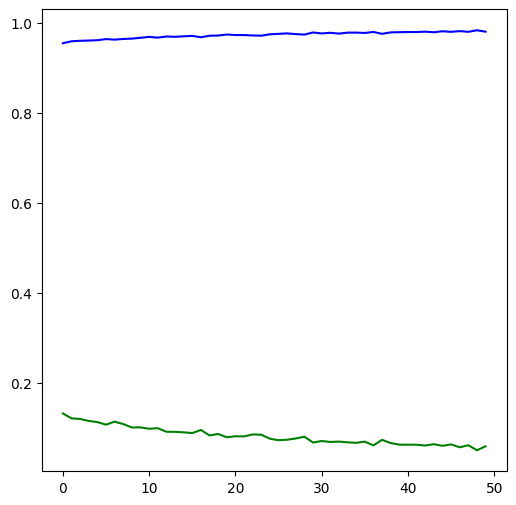

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


# Hyperparameter tuning

In [163]:
#!pip install keras_tuner

In [164]:
# # Define the hyperparameters search space
# hyperparam_distribution_range = {
#     'batch_size': [16, 32, 64, 128],
#     'learning_rate': [0.0001, 0.001, 0.01],
#     'hidden_size': [128, 256, 512, 1024],
#     'dense_units': [64, 128, 256, 512],
#     'dropout_rate': [0.1, 0.2, 0.3]
# }

# best_accuracy = 0.0
# best_hyperparameters = {}

# for batch_size in hyperparam_distribution_range['batch_size']:
#     for learning_rate in hyperparam_distribution_range['learning_rate']:
#         for hidden_size in hyperparam_distribution_range['hidden_size']:
#             for dense_units in hyperparam_distribution_range['dense_units']:
#                 for dropout_rate in  hyperparam_distribution_range['dropout_rate']:
#                     print(batch_size, learning_rate, hidden_size, dense_units, dropout_rate)
#                     # Build the model
#                     model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size, hidden_size, dropout_rate, learning_rate, dense_units)
                    
#                     # Train the model
#                     model.fit(pre_processed_X_train, y_train_reshaped, epochs=50, verbose=0, validation_split=0.2, shuffle=True)
    
#                     # Get the validation accuracy from the history
#                     val_accuracy = history.history['val_accuracy'][-1]
    
#                     # Check if it is the highest accuracy
#                     if val_accuracy > best_accuracy:
#                         best_hyperparameters = {
#                             'batch_size': batch_size,
#                             'learning_rate': learning_rate,
#                             'hidden_size': hidden_size,
#                             'dense_units': dense_units,
#                             'dropout_rate': dropout_rate
#                         }
                

# # Print the best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

# Confusion Matrix on Test data

In [165]:
# !pip install seaborn

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[431  30 489 427 423 369 420 197 333  46 318 327 315 225 292  31]


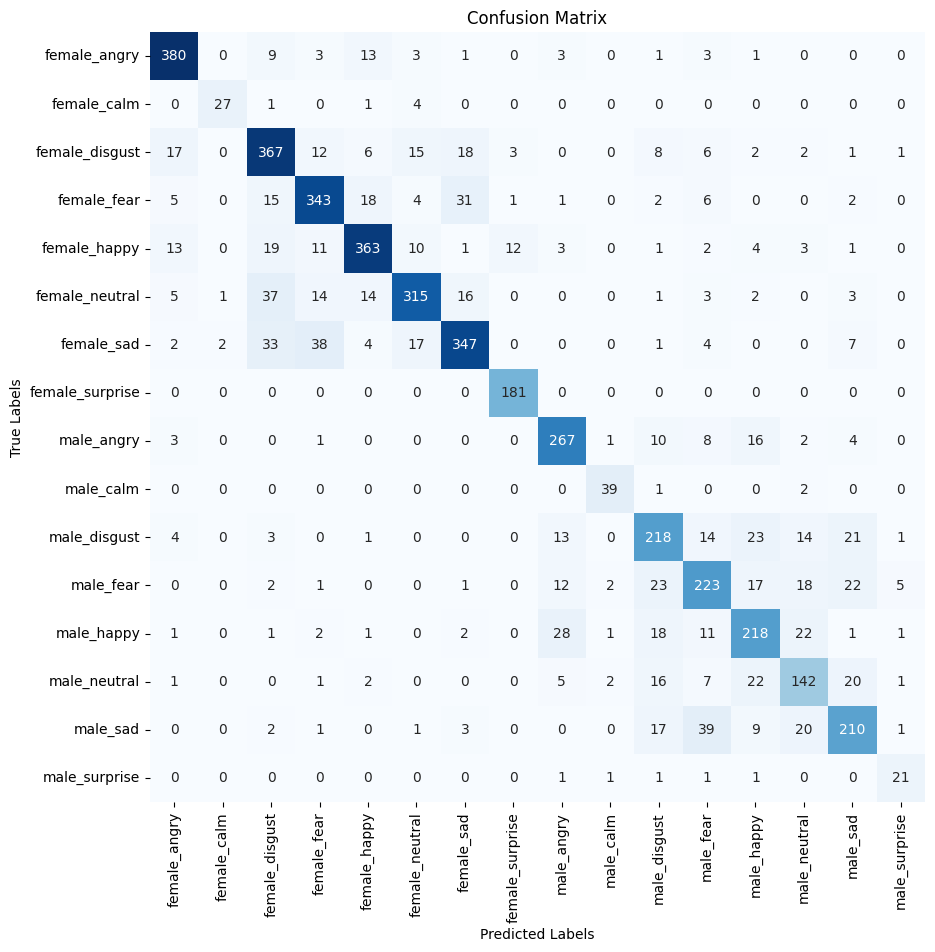

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = model.predict(pre_processed_X_test)

# Remove the center dimension
y_pred = y_pred[:, 0, :]

# If your model outputs probabilities and you want to get the class with highest probability
# Converts one hot encoded labels back to integer values
y_pred_classes = np.argmax(y_pred, axis=1)

# Count the number of instances in each class
class_counts = np.bincount(y_pred_classes)
print(class_counts)

# Create a list of class labels
class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# Evaluation using F1 score

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions and calculate metrics
y_pred = model.predict(pre_processed_X_test)
# Remove the center dimension
y_pred = y_pred[:, 0, :]
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print("\n")

# For a detailed classification report including precision, recall, f1-score per class
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.784571658743965, Recall: 0.7834367643911834, F1-Score: 0.7833077540129237


                 precision    recall  f1-score   support

   female_angry       0.88      0.91      0.90       417
    female_calm       0.90      0.82      0.86        33
 female_disgust       0.75      0.80      0.78       458
    female_fear       0.80      0.80      0.80       428
   female_happy       0.86      0.82      0.84       443
 female_neutral       0.85      0.77      0.81       411
     female_sad       0.83      0.76      0.79       455
female_surprise       0.92      1.00      0.96       181
     male_angry       0.80      0.86      0.83       312
      male_calm       0.85      0.93      0.89        42
   male_disgust       0.69      0.70      0.69       312
      male_fear       0.68      0.68      0.68       326
     male_happy       0.69      0.71      0.70       307
   male_neutral       0.63      0.65      0.64       219
       male_sa

# Make Predictions

In [168]:
# import librosa

# # Function to extract features
# def extract_features(audio_file):
#   # Load audio file
#   data, sample_rate = librosa.load(audio_file)

#   # Extract features
#   mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#   spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T,axis=0)
#   chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T,axis=0)
#   mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T,axis=0)
#   tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T,axis=0)

#   # Create dataframe with extracted features
#   features = np.concatenate([mfcc, spectral_contrast, chroma, mel, tonnetz])
#   feature_names = [f'MFCC_{i}' for i in range(mfcc.shape[0])] + \
#                     [f'SPECTRAL_CONTRAST_{i}' for i in range(spectral_contrast.shape[0])] + \
#                     [f'CHROMA_{i}' for i in range(chroma.shape[0])] + \
#                     [f'MEL_{i}' for i in range(mel.shape[0])] + \
#                     [f'TONZ_{i}' for i in range(tonnetz.shape[0])]
#   feature_df = pd.DataFrame([features], columns=feature_names)

#   return feature_df


# # Function to reshape feature
# def reshape_feature(extracted_feature):
#   extracted_feature = extracted_feature.values
#   reshaped_feature = np.expand_dims(extracted_feature, -1)

#   return reshaped_feature


# # Function to prediction
# def get_prediction(audio_feature, with_gender):
#   prediction = model.predict(audio_feature)
#   label = np.argmax(prediction, axis=1)
#   if with_gender:
#     categorical_label = label_map_with_gender[label[0]]
#   else:
#     categorical_label = label_map_without_gender[label[0]]

#   return categorical_label

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>